In [1]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as tts
import nltk
from sklearn.naive_bayes import BernoulliNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re
import string
stopword= set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

In [2]:
data= pd.read_csv("dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
def clean(text):
    """
    Preprocesses the input text by applying various cleaning steps.

    Parameters:
    text (str): The input text to be cleaned.

    Returns:
    str: The cleaned text after applying preprocessing steps.
    """
    # Convert the text to lowercase
    text = str(text).lower()

    # Remove text within square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove URLs starting with 'http://' or 'https://' or 'www.'
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove alphanumeric words containing digits
    text = re.sub('\w*\d\w*', '', text)

    # Remove stopwords
    stopword = set(stopwords.words('english'))
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)

    # Stem the words
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text

# Apply the 'clean()' function to the "review" column of the 'data' DataFrame
data["review"] = data["review"].apply(clean)


In [4]:
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator

In [5]:
text = ' '.join(i for i in data.review)
text[:50]

'one review mention watch  oz episod youll hook rig'

In [6]:
stopwords=set(STOPWORDS)

In [7]:
wordcloud=WordCloud(stopwords = stopwords , background_color = 'white' ).generate(text)

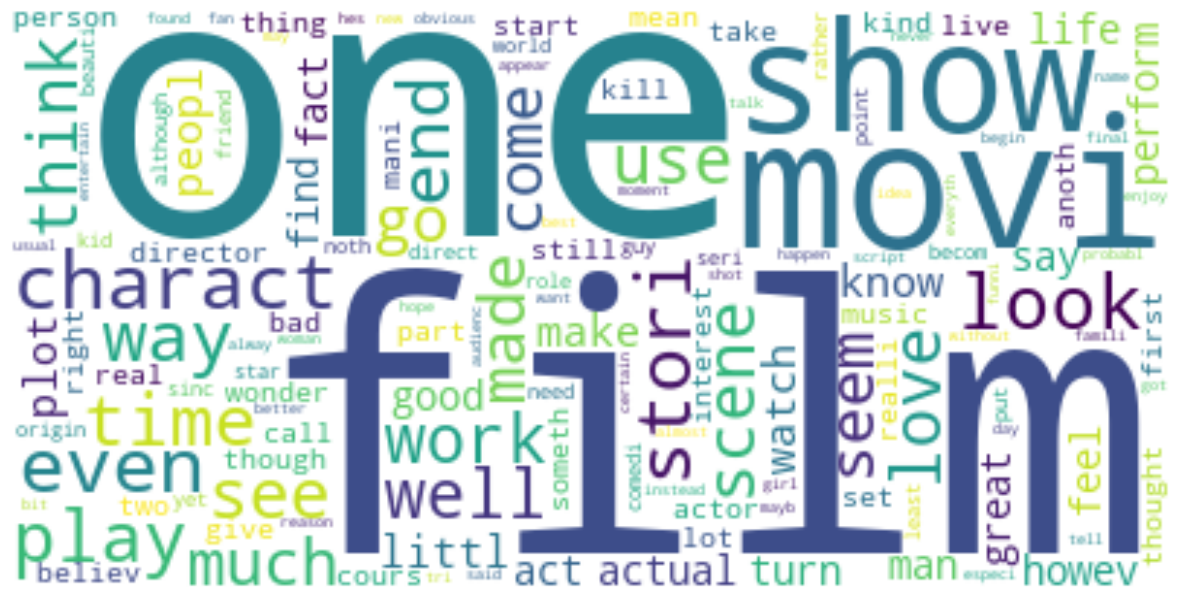

In [8]:
# Import the necessary libraries
import matplotlib.pyplot as plt


# Create a figure with a specific size
plt.figure(figsize=(15, 10))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Remove the axis labels and ticks
plt.axis('off')

# Show the plot
plt.show()


In [9]:
x=np.array(data['review'])
y = np.array(data['sentiment'])

In [10]:
# Create a CountVectorizer object
cv = CountVectorizer()

# Transform the textual data into a matrix of token counts
X = cv.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)

In [11]:
# Import the necessary libraries
from sklearn.linear_model import PassiveAggressiveClassifier

# Create a PassiveAggressiveClassifier object
model = PassiveAggressiveClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 85.94000000000001


In [15]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(f'Predicted Sentiment is {output[0]}')

Enter a Text: awesome!!!
Predicted Sentiment is positive
